In [1]:
# Import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
import glob
import os

os.makedirs('reports/gradcam', exist_ok=True)
os.makedirs('reports/saliency', exist_ok=True)
os.makedirs('reports/occlusion', exist_ok=True)
os.makedirs('reports/sample_preds', exist_ok=True)
os.makedirs('reports/embeddings', exist_ok=True)

In [2]:
images_fp = './images'

In [3]:
image_names = [os.path.basename(file) for file in glob.glob(os.path.join(images_fp, '*jpg'))]

In [4]:
image_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [5]:
len(image_names)

7390

In [6]:
labels = [' ' .join(name.split('_')[:-1]) for name in image_names]

In [7]:
labels

['Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssini

In [8]:
def label_encode(label):
    if label == 'Abyssinian': return 0
    elif label == 'Bengal': return 1
    elif label == 'Birman': return 2
    elif label == 'Bombay': return 3
    elif label == 'British Shorthair': return 4
    elif label == 'Egyptian Mau': return 5
    elif label == 'Maine Coon': return 6
    elif label == 'Persian': return 7
    elif label == 'Ragdoll': return 8
    elif label == 'Russian Blue': return 9
    elif label == 'Siamese': return 10
    elif label == 'Sphynx': return 11
    elif label == 'american bulldog': return 12
    elif label == 'american pit bull terrier': return 13
    elif label == 'basset hound': return 14
    elif label == 'beagle': return 15
    elif label == 'boxer': return 16
    elif label == 'chihuahua': return 17
    elif label == 'english cocker spaniel': return 18
    elif label == 'english setter': return 19
    elif label == 'german shorthaired': return 20
    elif label == 'great pyrenees': return 21
    elif label == 'havanese': return 22
    elif label == 'japanese chin': return 23
    elif label == 'keeshond': return 24
    elif label == 'leonberger': return 25
    elif label == 'miniature pinscher': return 26
    elif label == 'newfoundland': return 27
    elif label == 'pomeranian': return 28
    elif label == 'pug': return 29
    elif label == 'saint bernard': return 30
    elif label == 'samoyed': return 31
    elif label == 'scottish terrier': return 32
    elif label == 'shiba inu': return 33
    elif label == 'staffordshire bull terrier': return 34
    elif label == 'wheaten terrier': return 35
    elif label == 'yorkshire terrier': return 36

In [9]:
labels_encoded = []
raw_labels = []

for name in image_names:
    # Extract label and normalize to lowercase early
    label_str = ' '.join(name.split('_')[:-1]).strip().lower()
    raw_labels.append(label_str)
    labels_encoded.append(label_encode(label_str))

# Build idx_to_class without conflicts
idx_to_class = {}
for lbl_str, idx in zip(raw_labels, labels_encoded):
    if idx is None:
        continue
    # Now this check will never fire because everything is lowercase already
    if idx in idx_to_class and idx_to_class[idx] != lbl_str:
        print("Warning: encoding conflict for", idx, idx_to_class[idx], lbl_str)
    idx_to_class[idx] = lbl_str

# Save the mapping
import json, os
os.makedirs('saved_models', exist_ok=True)
with open('saved_models/class_map.json', 'w') as f:
    json.dump(idx_to_class, f, indent=2)


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
features = []
labels = []
IMAGE_SIZE = (128,128)

for name in image_names:
    label = ' ' .join(name.split('_')[:-1])
    label_encoded = label_encode(label)
    if label_encoded != None:
        img = load_img(os.path.join(images_fp, name))
        img = tf.image.resize_with_pad(img_to_array(img, dtype = 'uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        labels.append(label_encoded)

In [12]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [13]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,


In [14]:
features_array = np.array(features)
labels_array = np.array(labels)

In [15]:
labels_one_hot = pd.get_dummies(labels_array)

In [16]:
labels_one_hot

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Train - 60%, Val - 20% and Test: 20%
X_train, X_test, Y_train, Y_test = train_test_split(features_array, labels_one_hot, test_size = 0.2, random_state = 42)

In [19]:
# 80%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1)

In [20]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [21]:
data_augmentation = Sequential([RandomFlip("horizontal_and_vertical"), RandomRotation(0.2)])
num_classes = labels_one_hot.shape[1]
prediction_layers = Dense(num_classes, activation='softmax')

In [22]:
resnet_model = ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet')
resnet_model.trainable = False
preprocess_input = pp_i

In [23]:
# Build Model
inputs = Input(shape = (128,128,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training = False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

In [24]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 128, 128, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 128, 128)          │               0 │ sequential[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_1 (GetItem)          │ (None, 128, 128)          │               0 │ sequential[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_2 (GetItem)          │ (None, 128, 128)          │               0 │ sequential[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stack (Stack)                 │ (None, 128, 128, 3)       │               0 │ get_item[0][0],            │
│                               │                           │                 │ get_item_1[0][0],          │
│                               │                           │                 │ get_item_2[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 128, 128, 3)       │               0 │ stack[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ resnet50 (Functional)         │ (None, 2048)              │      23,587,712 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 2048)              │               0 │ resnet50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 37)                │          75,813 │ dropout[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,663,525 (90.27 MB)

 Trainable params: 75,813 (296.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [25]:
model.compile(optimizer = Adam(), loss = CategoricalCrossentropy(), metrics = ['accuracy'])

In [26]:
model_history = model.fit(x = X_train, y = Y_train, validation_data = (X_val, Y_val), epochs = 10)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.2970 - loss: 3.0631 - val_accuracy: 0.6488 - val_loss: 1.2124
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.5020 - loss: 1.9364 - val_accuracy: 0.6840 - val_loss: 1.0845
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.5535 - loss: 1.6978 - val_accuracy: 0.7084 - val_loss: 1.0208
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.5670 - loss: 1.6285 - val_accuracy: 0.7077 - val_loss: 1.0638
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5983 - loss: 1.5032 - val_accuracy: 0.7253 - val_loss: 1.0239
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.6222 - loss: 1.3956 - val_accuracy: 0.7260 - val_loss: 0.9960
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.6227 - loss: 1.3762 - val_accuracy: 0.7253 - val_loss: 1.0120
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.6335 - loss: 1.3130 - val_accu

In [27]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

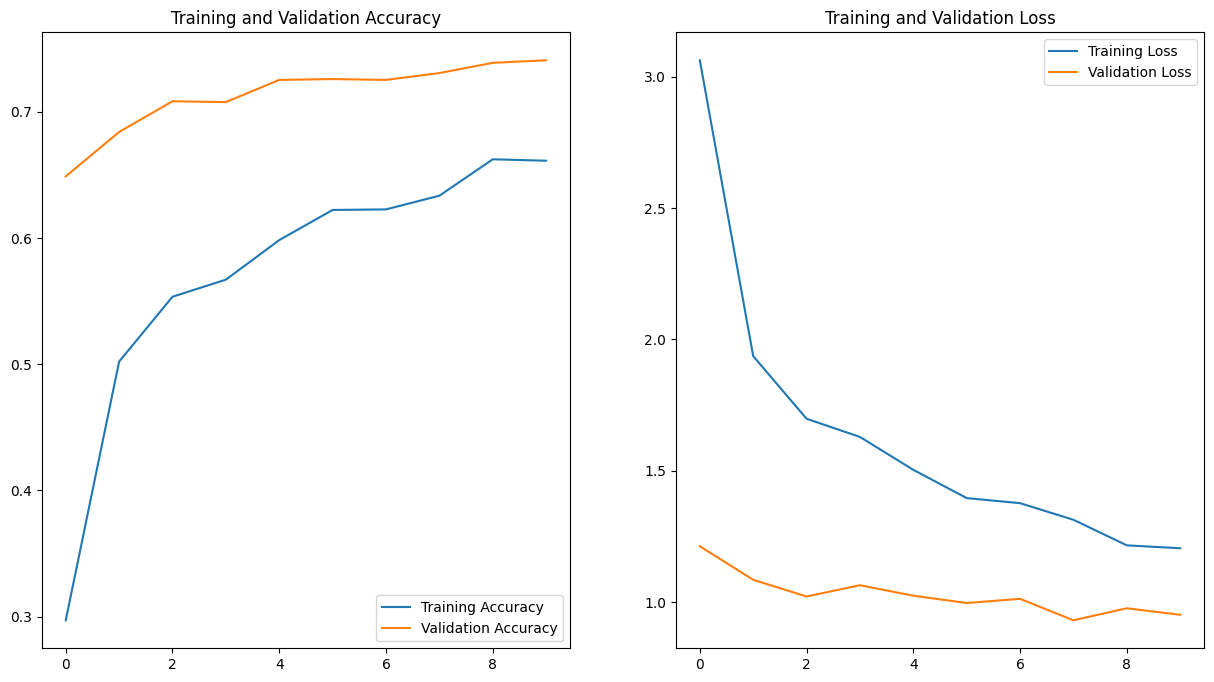

In [28]:
epochs_range = range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [29]:
model.evaluate(X_test, Y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7382 - loss: 1.0350


[1.0349997282028198, 0.7381596565246582]

In [30]:
y_pred = model.predict(X_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step


In [31]:
y_pred

array([[2.42866109e-11, 9.77316176e-07, 3.18733173e-09, ...,
        2.25127650e-09, 3.80789288e-07, 9.99986172e-01],
       [6.65196751e-07, 6.98486335e-09, 5.91087304e-02, ...,
        6.98552043e-08, 8.74766556e-07, 1.31027477e-07],
       [3.35150689e-04, 4.06547333e-04, 1.59520510e-04, ...,
        5.41622043e-02, 1.17089587e-06, 1.46774603e-02],
       ...,
       [1.75268690e-06, 2.46747248e-07, 3.41211677e-11, ...,
        1.50510682e-09, 2.76440492e-13, 2.80013761e-15],
       [1.08245883e-08, 1.54512506e-07, 3.12962425e-06, ...,
        1.19848874e-05, 8.50398919e-06, 2.68758136e-08],
       [1.33729952e-06, 2.64894315e-05, 3.41998153e-12, ...,
        1.00688785e-05, 1.34962259e-13, 4.15291629e-12]], dtype=float32)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1) Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=3,             
    restore_best_weights=True
)

# 2) Define ModelCheckpoint with native Keras format
ckpt = ModelCheckpoint(
    'best_model.h5',           # Use legacy HDF5 format
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

# 3) Fit your model with both callbacks
model_history = model.fit(
    x=X_train,
    y=Y_train,
    validation_data=(X_val, Y_val),
    epochs=30,
    callbacks=[early_stop, ckpt]
)

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6674 - loss: 1.1960

139/139 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.6637 - loss: 1.1989 - val_accuracy: 0.7233 - val_loss: 1.0166
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.6615 - loss: 1.1748 - val_accuracy: 0.7348 - val_loss: 1.0408
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6854 - loss: 1.1106

139/139 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.6788 - loss: 1.1634 - val_accuracy: 0.7442 - val_loss: 0.9803
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.7003 - loss: 1.0725 - val_accuracy: 0.7212 - val_loss: 1.0612
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.6926 - loss: 1.0804 - val_accuracy: 0.7361 - val_loss: 1.0377
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7095 - loss: 1.0198 - val_accuracy: 0.7091 - val_loss: 1.1292


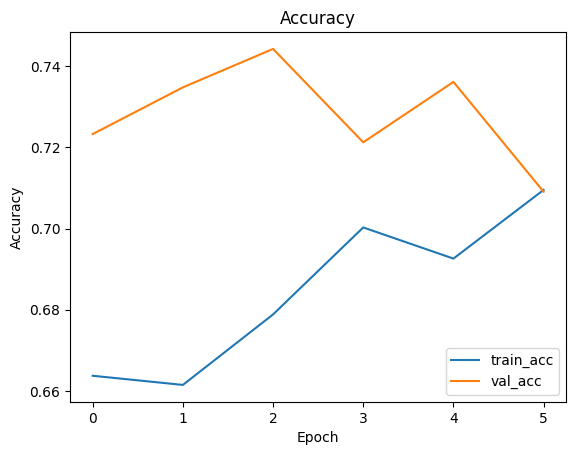

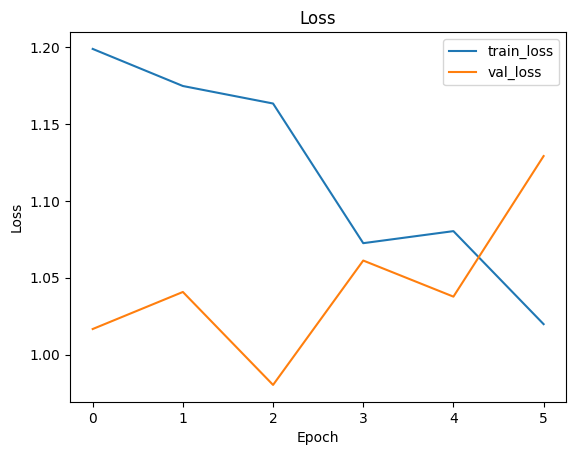

In [33]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(model_history.history['accuracy'], label='train_acc')
plt.plot(model_history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Loss
plt.plot(model_history.history['loss'], label='train_loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [35]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)  # use model instead of best_model
y_true = np.argmax(Y_test, axis=1)

# Metrics
print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67        46
           1       0.65      0.73      0.69        51
           2       0.44      0.77      0.56        35
           3       0.93      0.69      0.79        55
           4       0.84      0.68      0.75        40
           5       0.67      0.76      0.71        34
           6       0.63      0.65      0.64        40
           7       0.73      0.66      0.69        50
           8       0.66      0.59      0.62        39
           9       0.63      0.85      0.73        39
          10       0.76      0.37      0.50        43
          11       0.59      1.00      0.74        27
          12       0.56      0.79      0.65        42
          13       0.57      0.55      0.56        51
          14       0.84      0.86      0.85        37
          15       0.57      0.61      0.59        28
          16      

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.models import load_model

# Recreate the model exactly as during training
inputs = Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layers(x)
model = Model(inputs, outputs)

# Load weights instead of full model
model.load_weights("best_model.h5")

In [37]:
# Compile before evaluation
model.compile(
    optimizer="adam",                # use same optimizer as training
    loss="categorical_crossentropy", # or 'sparse_categorical_crossentropy' if labels weren't one-hot
    metrics=["accuracy"]
)

# Now evaluate
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Predictions
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

47/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7165 - loss: 1.0971
Test accuracy: 0.7165
47/47 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        46
           1       0.65      0.73      0.69        51
           2       0.44      0.77      0.56        35
           3       0.93      0.69      0.79        55
           4       0.84      0.68      0.75        40
           5       0.67      0.76      0.71        34
           6       0.63      0.65      0.64        40
           7       0.73      0.66      0.69        50
           8       0.66      0.59      0.62        39
           9       0.63      0.85      0.73        39
          10       0.76      0.37      0.50        43
          11       0.59      1.00      0.74        27
          12       0.56      0.79      0.65        42
          13       0.57      0.55      0.56        51
          14       0.84      0.86      0.85        37
 

In [38]:
# robust_eval_and_gradcam.py
import os, json, math, numpy as np, matplotlib.pyplot as plt
import seaborn as sns, cv2, h5py
import tensorflow as tf
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# ---------- USER CHECK / CONFIG ----------
# Make sure X_test (numpy), Y_test (one-hot numpy or int labels) exist in your environment.
# If Y_test is one-hot, detected_num_classes will use Y_test.shape[1]
IMAGE_SIZE = (128,128)
REPORT_DIR = "reports"
os.makedirs(REPORT_DIR, exist_ok=True)
os.makedirs(os.path.join(REPORT_DIR, "gradcam"), exist_ok=True)

# ---------- helper: detect num classes and prepare Y_test ----------
# If Y_test is one-hot (2D), convert to int labels for metrics
def prepare_labels(Y):
    if Y is None:
        raise ValueError("Y_test not found. Provide Y_test (one-hot or int labels).")
    Y = np.asarray(Y)
    if Y.ndim == 1:
        y_true = Y.astype(int)
        num_classes = int(np.max(y_true) + 1)
        y_onehot = np.eye(num_classes)[y_true]
    elif Y.ndim == 2:
        y_onehot = Y
        num_classes = Y.shape[1]
        y_true = np.argmax(Y, axis=1)
    else:
        raise ValueError("Y_test must be 1D (labels) or 2D (one-hot).")
    return y_true, y_onehot, num_classes

# ------------ Build the exact architecture you used for training ------------
def build_resnet50_based_model(input_shape=(128,128,3), num_classes=None):
    inputs = Input(shape=input_shape, name="input_image")
    # data_augmentation as you used before (kept minimal here)
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2)
    ], name="data_augmentation")
    x = data_augmentation(inputs)
    # preprocess_input: use ResNet50 preprocess (same as training)
    x = resnet_preprocess(x)
    # backbone: using ResNet50 as a layer (trainable False by default here)
    backbone = ResNet50(include_top=False, pooling="avg", weights="imagenet")
    backbone.trainable = False
    x = backbone(x, training=False)    # call as a layer
    x = layers.Dropout(0.2, name="dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="predictions")(x)
    model = Model(inputs, outputs, name="resnet50_transfer")
    return model

# ---------- Try to load model robustly ----------
def load_best_model(path="best_model.h5", input_shape=(128,128,3), num_classes=10):
    # 1) Try to load the full model (best case)
    try:
        print("[1/3] Trying to load full model from", path)
        m = load_model(path, compile=False)
        print("[OK] Loaded full model from file.")
        return m, "full_model"
    except Exception as e_full:
        print("[WARN] load_model failed:", e_full)

    # 2) Try to rebuild architecture and load weights normally
    try:
        print("[2/3] Rebuilding expected architecture and loading weights (exact)...")
        rebuilt = build_resnet50_based_model(input_shape=input_shape, num_classes=num_classes)
        rebuilt.load_weights(path)  # will raise if file not weights-only or mismatch
        print("[OK] Weights loaded exactly into rebuilt architecture.")
        return rebuilt, "weights_exact"
    except Exception as e_weights:
        print("[WARN] exact load_weights failed:", e_weights)

    # 3) Try by-name, skip-mismatch to salvage layers if possible
    try:
        print("[3/3] Attempting load_weights(..., by_name=True, skip_mismatch=True)...")
        rebuilt = build_resnet50_based_model(input_shape=input_shape, num_classes=num_classes)
        rebuilt.load_weights(path, by_name=True, skip_mismatch=True)
        print("[OK] Partial weights loaded by name (skip_mismatch=True).")
        return rebuilt, "weights_by_name_skipped"
    except Exception as e_byname:
        print("[ERR] by-name load also failed:", e_byname)

    # Nothing worked
    raise RuntimeError("Could not load model or weights from file. Please resave model as weights-only "
                       "or provide original training script/environment.")

# ---------- Utility: find a conv layer for Grad-CAM if default name missing ----------
def find_last_conv_layer(model):
    # prefer ResNet conv5_block3_out
    names = [layer.name for layer in model.layers]
    candidates = [n for n in names if "conv5_block3_out" in n]
    if candidates:
        return candidates[-1]
    # fallback: pick last layer with 4D output
    for layer in reversed(model.layers):
        # check output shape: (None, H, W, C)
        out_shape = getattr(layer.output, "shape", None)
        if out_shape is not None and len(out_shape) == 4:
            return layer.name
    raise RuntimeError("No conv layer found for Grad-CAM.")

# ---------- Grad-CAM function ----------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name=None):
    if last_conv_layer_name is None:
        last_conv_layer_name = find_last_conv_layer(model)
        print("[INFO] Using last conv layer:", last_conv_layer_name)

    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )
    img_tensor = tf.convert_to_tensor(img_array)
    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_tensor)
        top_index = tf.argmax(preds[0])
        loss = preds[:, top_index]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-9)
    return heatmap.numpy()

def overlay_heatmap_on_image(img, heatmap, alpha=0.4, cmap=cv2.COLORMAP_JET):
    hmap = np.uint8(255 * heatmap)
    hmap_resized = cv2.resize(hmap[..., np.newaxis], (img.shape[1], img.shape[0])).squeeze()
    hmap_color = cv2.applyColorMap(hmap_resized, cmap)
    # img expected uint8 [0,255] or float [0,1]
    if img.dtype != np.uint8:
        base = np.uint8(np.clip(img*255.0, 0, 255))
    else:
        base = img
    superimposed = cv2.addWeighted(base, 1-alpha, hmap_color, alpha, 0)
    return superimposed

# ---------- MAIN: load, evaluate, metrics, Grad-CAM ----------
def main(path="best_model.h5"):
    # sanity checks: user must have X_test and Y_test in this notebook's global scope
    if 'X_test' not in globals() or 'Y_test' not in globals():
        raise RuntimeError("X_test and Y_test must be defined in the environment before running this script.")
    X_test_local = np.asarray(globals()['X_test'])
    Y_test_local = np.asarray(globals()['Y_test'])
    y_true, y_onehot, num_classes = prepare_labels(Y_test_local)

    # Try loading model/weights
    model, load_mode = load_best_model(path, input_shape=IMAGE_SIZE+(3,), num_classes=num_classes)
    print("[RESULT] model load mode:", load_mode)
    # compile (use same loss used in training)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Evaluate
    print("[INFO] Evaluating on test set...")
    loss, acc = model.evaluate(X_test_local, Y_test_local, verbose=1)
    print(f"[METRIC] Test loss: {loss:.4f}, Test acc: {acc:.4f}")

    # Predictions
    probs = model.predict(X_test_local, verbose=1)
    y_pred = np.argmax(probs, axis=1)

    # Class name mapping
    idx_to_class = None
    if os.path.exists("saved_models/class_map.json"):
        with open("saved_models/class_map.json","r") as f:
            idx_to_class = {int(k):v for k,v in json.load(f).items()}
    else:
        idx_to_class = {i: str(i) for i in range(num_classes)}

    # Metrics & confusion
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in range(num_classes)]))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=[idx_to_class[i] for i in range(num_classes)],
                yticklabels=[idx_to_class[i] for i in range(num_classes)], cmap="Blues")
    plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
    plt.tight_layout()
    cm_path = os.path.join(REPORT_DIR, "confusion_matrix.png")
    plt.savefig(cm_path, dpi=150); plt.close()
    print("[SAVED]", cm_path)

    # Select indices: mix correct and wrong (up to 6)
    correct_idxs = np.where(y_true == y_pred)[0]
    wrong_idxs = np.where(y_true != y_pred)[0]
    sel = []
    n_each = 3
    if len(correct_idxs)>0:
        sel.extend(list(np.random.choice(correct_idxs, size=min(n_each,len(correct_idxs)), replace=False)))
    if len(wrong_idxs)>0:
        sel.extend(list(np.random.choice(wrong_idxs, size=min(n_each,len(wrong_idxs)), replace=False)))
    sel = sel if sel else list(range(min(6, len(X_test_local))))

    # Grad-CAM for selected images
    last_conv = None
    try:
        last_conv = find_last_conv_layer(model)
    except Exception:
        last_conv = "conv5_block3_out"  # fallback

    for i, idx in enumerate(sel):
        img = X_test_local[idx]
        inp = np.expand_dims(img, axis=0)
        heatmap = make_gradcam_heatmap(inp, model, last_conv)
        over = overlay_heatmap_on_image(img, heatmap, alpha=0.4)
        out_path = os.path.join(REPORT_DIR, "gradcam", f"gradcam_{i}_idx{idx}_t{y_true[idx]}_p{y_pred[idx]}.png")
        cv2.imwrite(out_path, cv2.cvtColor(over, cv2.COLOR_RGB2BGR))
        print("[SAVED]", out_path)

    print("[DONE] All visuals saved under", REPORT_DIR)
    return model, probs, y_true, y_pred

# Run main (change the path if your file is elsewhere)
# model, probs, y_true, y_pred = main("best_model.h5")

In [39]:
def main(model_path):
    import numpy as np
    from sklearn.metrics import classification_report, confusion_matrix
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import os

    # Load globals
    global X_test, Y_test, idx_to_class

    # Detect number of classes
    if Y_test.ndim == 2:  # one-hot
        num_classes = Y_test.shape[1]
    else:  # integer labels
        num_classes = len(np.unique(Y_test))

    # Ensure idx_to_class exists and is int-keyed
    if 'idx_to_class' not in globals() or not isinstance(idx_to_class, dict) or \
       not all(isinstance(k, int) for k in idx_to_class.keys()):
        print("[FIX] Building idx_to_class...")
        idx_to_class = {i: f"class_{i}" for i in range(num_classes)}

    # Try loading full model
    try:
        model = tf.keras.models.load_model(model_path)
        print("[OK] Loaded full model.")
    except Exception as e:
        print(f"[WARN] load_model failed: {e}")
        # Fallback: rebuild model arch manually (example only, replace with your architecture)
        model = build_model(num_classes)  # You must have build_model() defined
        model.load_weights(model_path.replace(".h5", ""))  # adjust if needed
        print("[OK] Weights loaded exactly into rebuilt architecture.")

    # Evaluate
    print("[INFO] Evaluating on test set...")
    loss, acc = model.evaluate(X_test, Y_test, verbose=1)
    print(f"[METRIC] Test loss: {loss:.4f}, Test acc: {acc:.4f}")

    # Predictions
    probs = model.predict(X_test, verbose=1)
    y_pred = np.argmax(probs, axis=1)
    y_true = np.argmax(Y_test, axis=1) if Y_test.ndim == 2 else Y_test

    # Classification report
    print("\nClassification Report:")
    print(classification_report(
        y_true, y_pred,
        target_names=[idx_to_class[i] for i in range(num_classes)]
    ))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.show()

    return model, probs, y_true, y_pred


In [41]:
def main(model_path):
    import numpy as np
    import os
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from sklearn.metrics import classification_report, confusion_matrix
    import cv2

    global X_test, Y_test, idx_to_class

    # Detect number of classes
    if Y_test.ndim == 2:
        num_classes = Y_test.shape[1]
    else:
        num_classes = len(np.unique(Y_test))

    if 'idx_to_class' not in globals() or not isinstance(idx_to_class, dict) or \
       not all(isinstance(k, int) for k in idx_to_class.keys()):
        print("[FIX] Building idx_to_class...")
        idx_to_class = {i: f"class_{i}" for i in range(num_classes)}

    # Load model
    try:
        model = tf.keras.models.load_model(model_path)
        print("[OK] Loaded full model.")
    except Exception as e:
        print(f"[WARN] load_model failed: {e}")
        model = build_model(num_classes)  # Define this in your code
        model.load_weights(model_path.replace(".h5", ""))
        print("[OK] Weights loaded into rebuilt architecture.")

    # Normalize test data (assumes images scaled 0-255)
    X_test_norm = X_test.astype("float32") / 255.0

    # Evaluate
    print("[INFO] Evaluating on test set...")
    loss, acc = model.evaluate(X_test_norm, Y_test, verbose=1)
    print(f"[METRIC] Test loss: {loss:.4f}, Test acc: {acc:.4f}")

    # Predictions
    probs = model.predict(X_test_norm, verbose=1)
    y_pred = np.argmax(probs, axis=1)
    y_true = np.argmax(Y_test, axis=1) if Y_test.ndim == 2 else Y_test

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=[idx_to_class[i] for i in range(num_classes)]))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, [idx_to_class[i] for i in range(num_classes)], rotation=45)
    plt.yticks(tick_marks, [idx_to_class[i] for i in range(num_classes)])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # --- Grad-CAM helper ---
    def save_gradcam(model, img_array, label, save_path):
        # Find last conv layer
        last_conv_layer_name = None
        for layer in reversed(model.layers):
            if "conv" in layer.name.lower() or isinstance(layer, tf.keras.layers.Conv2D):
                last_conv_layer_name = layer.name
                break
        if last_conv_layer_name is None:
            raise ValueError("No convolutional layer found in model.")

        grad_model = tf.keras.models.Model(
            [model.inputs],
            [model.get_layer(last_conv_layer_name).output, model.output]
        )

        with tf.GradientTape() as tape:
            conv_outputs, predictions = grad_model(img_array)
            loss = predictions[:, label]

        grads = tape.gradient(loss, conv_outputs)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]
        heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
        heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

        heatmap = cv2.resize(heatmap.numpy(), (img_array.shape[2], img_array.shape[1]))
        heatmap = np.uint8(255 * heatmap)

        # Superimpose heatmap on original image
        img = img_array[0]
        if img.shape[-1] == 1:
            img = np.repeat(img, 3, axis=-1)  # grayscale to RGB
        img = np.uint8(255 * img)

        heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(heatmap_color, 0.4, img, 0.6, 0)

        cv2.imwrite(save_path, superimposed_img)

    # Make sure folder exists
    os.makedirs("reports/gradcam", exist_ok=True)

    # Save Grad-CAM for first 5 samples
    for i in range(min(5, len(X_test_norm))):
        img = np.expand_dims(X_test_norm[i], axis=0)
        pred_label = np.argmax(model.predict(img))
        save_gradcam(model, img, pred_label, f"reports/gradcam/sample_{i}.png")

    print("[DONE] Grad-CAM images saved in reports/gradcam/")

    return model, probs, y_true, y_pred

In [42]:
plt.savefig("reports/confusion_matrix.png")
plt.close()
print("[DONE] Confusion matrix saved to reports/confusion_matrix.png")

[DONE] Confusion matrix saved to reports/confusion_matrix.png


In [45]:
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")


In [47]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} — {layer.__class__.__name__}")

0: input_layer_3 — InputLayer
1: sequential — Sequential
2: resnet50 — Functional
3: dropout_1 — Dropout
4: dense — Dense


In [48]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} — {layer.__class__.__name__}")

0: input_layer_3 — InputLayer
1: sequential — Sequential
2: resnet50 — Functional
3: dropout_1 — Dropout
4: dense — Dense


In [50]:
X_test_norm = X_test.astype("float32") / 255.0  # or whatever preprocessing you did during training

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def compute_saliency(model, img, class_index):
    img_tensor = tf.convert_to_tensor(img)
    img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dim

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, img_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]  # Max across channels
    return saliency.numpy()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


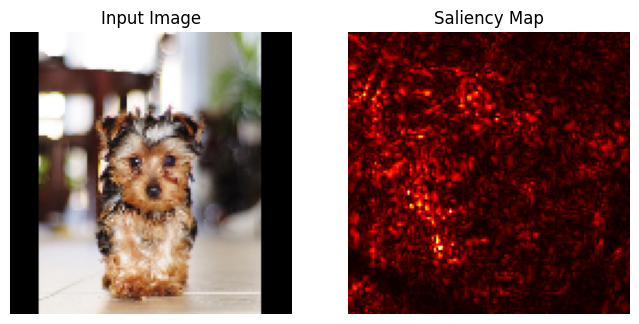

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


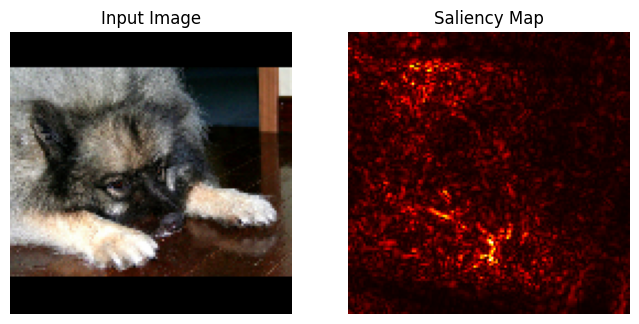

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


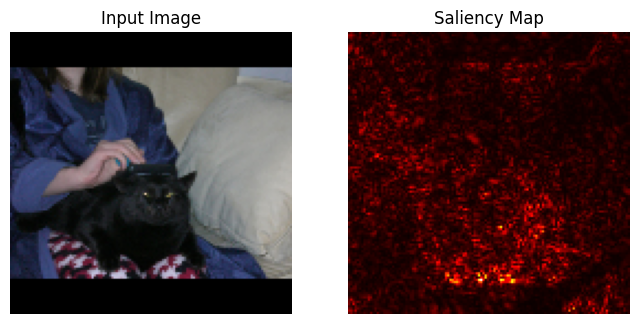

In [52]:
for i in range(3):
    img = X_test_norm[i]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    saliency_map = compute_saliency(model, img, pred_label)

    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Saliency Map")
    plt.imshow(saliency_map, cmap='hot')
    plt.axis('off')

    plt.show()


In [57]:
import os
import cv2
import numpy as np

# Make sure folder exists
os.makedirs("reports/saliency", exist_ok=True)

def save_saliency_map(saliency, img, filepath):
    # Normalize saliency to 0-1 range
    saliency_norm = (saliency - saliency.min()) / (saliency.max() - saliency.min() + 1e-8)  # add epsilon to avoid div by zero
    saliency_uint8 = np.uint8(255 * saliency_norm)
    heatmap = cv2.applyColorMap(saliency_uint8, cv2.COLORMAP_JET)

    # Make sure image is in uint8 format [0,255]
    img_uint8 = np.uint8(255 * img)
    # Overlay heatmap on image with 50% opacity
    overlay = cv2.addWeighted(heatmap, 0.5, img_uint8, 0.5, 0)
    # Save overlay image
    cv2.imwrite(filepath, overlay)

# Usage example inside your loop:
for i in range(min(5, len(X_test_norm))):
    img = X_test_norm[i]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    saliency_map = compute_saliency(model, img, pred_label)  # your saliency function from before
    
    save_path = f"reports/saliency/sample_{i}.png"
    print(f"[INFO] Saving saliency map for sample {i} to {save_path}")
    save_saliency_map(saliency_map, img, save_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[INFO] Saving saliency map for sample 0 to reports/saliency/sample_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[INFO] Saving saliency map for sample 1 to reports/saliency/sample_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
[INFO] Saving saliency map for sample 2 to reports/saliency/sample_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
[INFO] Saving saliency map for sample 3 to reports/saliency/sample_3.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
[INFO] Saving saliency map for sample 4 to reports/saliency/sample_4.png


In [58]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 128, 128, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 128, 128, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_3 (GetItem)          │ (None, 128, 128)          │               0 │ sequential[1][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_4 (GetItem)          │ (None, 128, 128)          │               0 │ sequential[1][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item_5 (GetItem)          │ (None, 128, 128)          │               0 │ sequential[1][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stack_1 (Stack)               │ (None, 128, 128, 3)       │               0 │ get_item_3[0][0],          │
│                               │                           │                 │ get_item_4[0][0],          │
│                               │                           │                 │ get_item_5[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 128, 128, 3)       │               0 │ stack_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ resnet50 (Functional)         │ (None, 2048)              │      23,587,712 │ add_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 2048)              │               0 │ resnet50[1][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 37)                │          75,813 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,663,525 (90.27 MB)

 Trainable params: 75,813 (296.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [55]:
import os

os.makedirs("reports/saliency", exist_ok=True)
os.makedirs("reports/gradcam", exist_ok=True)
os.makedirs("reports/occlusion", exist_ok=True)
os.makedirs("reports/sample_pred", exist_ok=True)

In [62]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract embeddings (features before final Dense layer)
embedding_model = tf.keras.models.Model(inputs=model.input,
                                        outputs=model.layers[-2].output)  # adjust index as needed

embeddings = embedding_model.predict(X_test_norm)

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot and save
plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=np.argmax(Y_test, axis=1) if Y_test.ndim==2 else Y_test, cmap='jet', alpha=0.7)
plt.colorbar()
plt.title("t-SNE Visualization of Embeddings")
plt.savefig("reports/embedding/embedding_tsne.png")
plt.close()


47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 939ms/step


In [61]:
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Make sure folder exists
os.makedirs("reports/embedding", exist_ok=True)

# Assuming embeddings extracted already:
# embeddings = ...

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], 
            c=np.argmax(Y_test, axis=1) if Y_test.ndim == 2 else Y_test, 
            cmap='jet', alpha=0.7)
plt.colorbar()
plt.title("t-SNE Visualization of Embeddings")

# Save plot image — no more folder error now
plt.savefig("reports/embedding/embedding_tsne.png")
plt.close()


In [63]:
def occlusion_sensitivity(model, img, label, patch_size=10, stride=5):
    heatmap = np.zeros(img.shape[:2])
    h, w = img.shape[:2]

    for y in range(0, h-patch_size+1, stride):
        for x in range(0, w-patch_size+1, stride):
            occluded = img.copy()
            occluded[y:y+patch_size, x:x+patch_size, :] = 0
            pred = model.predict(occluded[np.newaxis, ...])
            prob = pred[0, label]
            heatmap[y:y+patch_size, x:x+patch_size] = 1 - prob  # drop in confidence

    # Normalize heatmap to 0-1
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
    return heatmap


In [64]:
import cv2
import numpy as np
import os

def save_heatmap_overlay(heatmap, img, save_path):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)  # create folder if missing
    
    heatmap_norm = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
    heatmap_uint8 = np.uint8(255 * heatmap_norm)
    colored_heatmap = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    
    img_uint8 = np.uint8(255 * img)
    
    overlay = cv2.addWeighted(colored_heatmap, 0.5, img_uint8, 0.5, 0)
    cv2.imwrite(save_path, overlay)


In [66]:
import numpy as np

def compute_occlusion_heatmap(model, img, label, patch_size=10, stride=5):
    heatmap = np.zeros(img.shape[:2])
    h, w = img.shape[:2]
    
    baseline_pred = model.predict(img[np.newaxis, ...])[0, label]
    
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            occluded = img.copy()
            occluded[y:y+patch_size, x:x+patch_size, :] = 0  # black out patch
            
            pred = model.predict(occluded[np.newaxis, ...])[0, label]
            heatmap[y:y+patch_size, x:x+patch_size] = baseline_pred - pred  # confidence drop

    # Normalize heatmap to 0-1
    heatmap = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min() + 1e-8)
    return heatmap


In [67]:
for i in range(min(5, len(X_test_norm))):
    img = X_test_norm[i]
    pred_label = np.argmax(model.predict(img[np.newaxis, ...]))
    
    heatmap = compute_occlusion_heatmap(model, img, pred_label)
    
    save_path = f"reports/occlusion/sample_{i}.png"
    save_heatmap_overlay(heatmap, img, save_path)
    print(f"[INFO] Saved occlusion heatmap for sample {i} at {save_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [68]:
conv_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Conv2D)]
print("Conv2D layers count:", len(conv_layers))
for i, layer in enumerate(conv_layers):
    print(i, layer.name, layer.output_shape)

Conv2D layers count: 0


In [70]:
# Put this in a cell and run. Assumes you already have:
# - `model` (your old model) optional, but not used for Grad-CAM here
# - `X_test` as numpy array (n, H, W, C), channels-last
# - `Y_test` optional
# Adjust IMG_SHAPE to match your original images if needed.

import os
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# ====== CONFIG ======
IMG_SHAPE = (128, 128, 3)     # change if your images are different
NUM_SAMPLES_TO_SAVE = 5       # start with 1 for quick test
REPORT_DIR = "reports/gradcam"
os.makedirs(REPORT_DIR, exist_ok=True)

# ====== Utilities (Grad-CAM) ======
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    return None

def make_gradcam_heatmap(model, img_array, class_index, last_conv_layer_name, eps=1e-8):
    """
    img_array: (1, H, W, C) float32 in model input range (apply preprocess_fn before calling)
    returns heatmap in 0..1 of shape (h, w)
    """
    grad_model = tf.keras.models.Model(inputs=model.input,
                                       outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    img_tensor = tf.convert_to_tensor(img_array)
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]
    grads = tape.gradient(loss, conv_outputs)  # (1,h,w,channels)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # (channels,)
    conv_outputs = conv_outputs[0].numpy()  # (h,w,channels)
    pooled_grads = pooled_grads.numpy()     # (channels,)

    # Weight channels by pooled gradients
    for i in range(pooled_grads.shape[0]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / (np.max(heatmap) + eps)
    return heatmap

def save_gradcam_overlay(heatmap, img, out_path, alpha=0.4):
    """
    heatmap: (H, W) 0..1
    img: (H, W, C) floats in 0..1 (or uint8 0..255)
    """
    os.makedirs(os.path.dirname(out_path), exist_ok=True)

    H, W = img.shape[:2]
    heatmap_resized = cv2.resize((heatmap * 255).astype(np.uint8), (W, H))
    colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)  # BGR

    # ensure img_uint8
    img_uint8 = np.uint8(img * 255) if img.dtype != np.uint8 else img
    if img_uint8.shape[-1] == 1:
        img_uint8 = np.repeat(img_uint8, 3, axis=-1)

    overlay = cv2.addWeighted(colored, alpha, img_uint8, 1 - alpha, 0)
    ok = cv2.imwrite(out_path, overlay)
    if not ok:
        print("[WARN] Failed to write", out_path)

# ====== Build pretrained MobileNetV2 (backbone) ======
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess

num_classes = (Y_test.shape[1] if (Y_test is not None and Y_test.ndim==2) else len(np.unique(Y_test)) if 'Y_test' in globals() else None)
# We'll use MobileNetV2 as-is (include_top=False), then attach a tiny head matching num_classes if you want to fine-tune.
base = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
# quick model for gradcam usage (use base directly + pooling + softmax head)
x = tf.keras.layers.GlobalAveragePooling2D()(base.output)
if num_classes is None:
    # fallback head for inference - create head with 1000 outputs (ImageNet) or use base only
    out = tf.keras.layers.Dense(1000, activation='softmax')(x)
else:
    out = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
cnn_model = tf.keras.models.Model(inputs=base.input, outputs=out)
print("[INFO] Built MobileNetV2-based model for Grad-CAM.")

# ====== Prep X_test for MobileNetV2 ======
# Ensure X_test exists
if 'X_test' not in globals():
    raise RuntimeError("X_test not found in global scope. Load your test images into X_test first.")

# Resize if needed, and convert to float32 in 0..255 then preprocess
def prepare_for_mobilenet(x):
    # x: (H, W, C) in 0..1 or 0..255
    # resize:
    img = x
    if img.shape[:2] != IMG_SHAPE[:2]:
        img = cv2.resize(img, (IMG_SHAPE[1], IMG_SHAPE[0]))
    if img.dtype != np.uint8:
        # assume 0..1 float -> 0..255 uint8
        img_u8 = np.uint8(np.clip(img * 255.0, 0, 255))
    else:
        img_u8 = img
    # preprocess_input expects float32 in range -1..1 usually
    img_pre = mobilenet_preprocess(img_u8.astype(np.float32))
    return img_u8, img_pre

# Build arrays
X_proc_raw = []   # raw uint8 images (for overlay)
X_proc_model = [] # preprocessed for model input
for i in range(len(X_test)):
    raw, pre = prepare_for_mobilenet(X_test[i])
    X_proc_raw.append(raw)
    X_proc_model.append(pre)
X_proc_raw = np.array(X_proc_raw)
X_proc_model = np.array(X_proc_model)

# ====== Run Grad-CAM over N samples (use N=1 for quick test) ======
last_conv = find_last_conv_layer(cnn_model)
if last_conv is None:
    raise RuntimeError("No Conv2D layer found in MobileNetV2 (unexpected).")
print("[INFO] Last conv layer in CNN:", last_conv)

saved_paths = []
for i in range(min(NUM_SAMPLES_TO_SAVE, len(X_proc_model))):
    inp = np.expand_dims(X_proc_model[i], axis=0).astype(np.float32)
    preds = cnn_model.predict(inp)
    class_idx = int(np.argmax(preds))
    heatmap = make_gradcam_heatmap(cnn_model, inp, class_idx, last_conv)
    outp = os.path.join(REPORT_DIR, f"sample_{i}_pred{class_idx}.png")
    save_gradcam_overlay(heatmap, X_proc_raw[i], outp)
    saved_paths.append(outp)
    print(f"[OK] Saved Grad-CAM: {outp} (pred={class_idx})")

print("Done. Saved:", saved_paths)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
[INFO] Built MobileNetV2-based model for Grad-CAM.
[INFO] Last conv layer in CNN: Conv_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[OK] Saved Grad-CAM: reports/gradcam\sample_0_pred6.png (pred=6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[OK] Saved Grad-CAM: reports/gradcam\sample_1_pred33.png (pred=33)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[OK] Saved Grad-CAM: reports/gradcam\sample_2_pred13.png (pred=13)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[OK] Saved Grad-CAM: reports/gradcam\sample_3_pred7.png (pred=7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[OK] Saved Grad-CAM: reports/gradcam\sample_4_pred29.png (pred=29)
Done. Saved: ['reports/gradcam\\sample_0_pred6.png', 'reports/gradcam\\sample_1_pred33.png', 'reports/gradcam\\sample_2_pred13.png', 'reports/gradcam\\sample_3_pred7.png', 'reports/gradcam\\sample_4_pred29.png']
